In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
from flaml import AutoML

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
print(pd.unique(df.RiskLevel))

['high risk' 'low risk' 'mid risk']


In [5]:
df["RiskString"] = df["RiskLevel"] 
df["RiskLevel"].replace(["high risk", "mid risk", "low risk"], [3, 2, 1], inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(int)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,RiskString
0,25,130,80,15.0,98.0,86,3,high risk
1,35,140,90,13.0,98.0,70,3,high risk
2,29,90,70,8.0,100.0,80,3,high risk
3,30,140,85,7.0,98.0,70,3,high risk
4,35,120,60,6.1,98.0,76,1,low risk


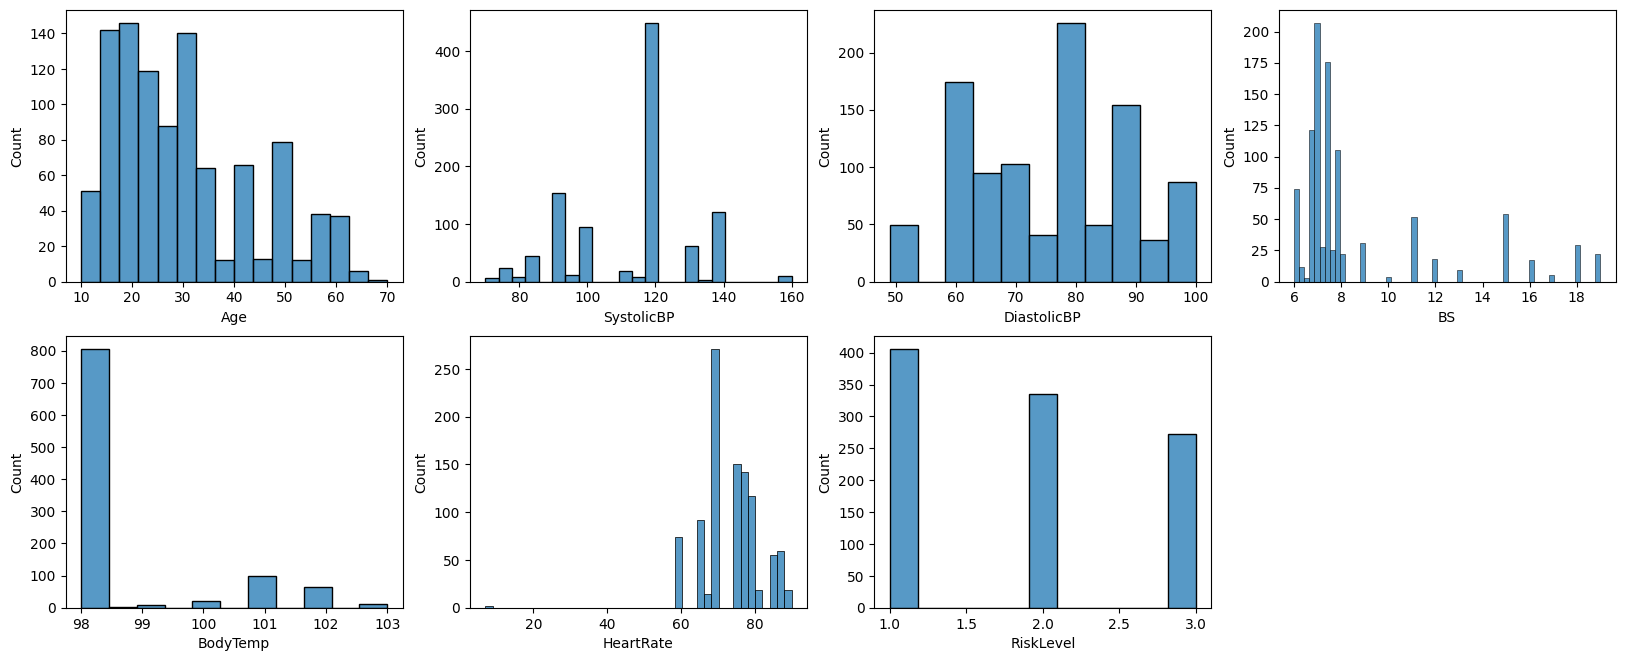

In [6]:
plt.figure(figsize=(20,12))
num=0

plot_columns = df.select_dtypes(include='number').columns
for column in plot_columns: 
    num += 1
    plt.subplot(3,4,num)
    sns.histplot(data=df, x=column)
plt.show()

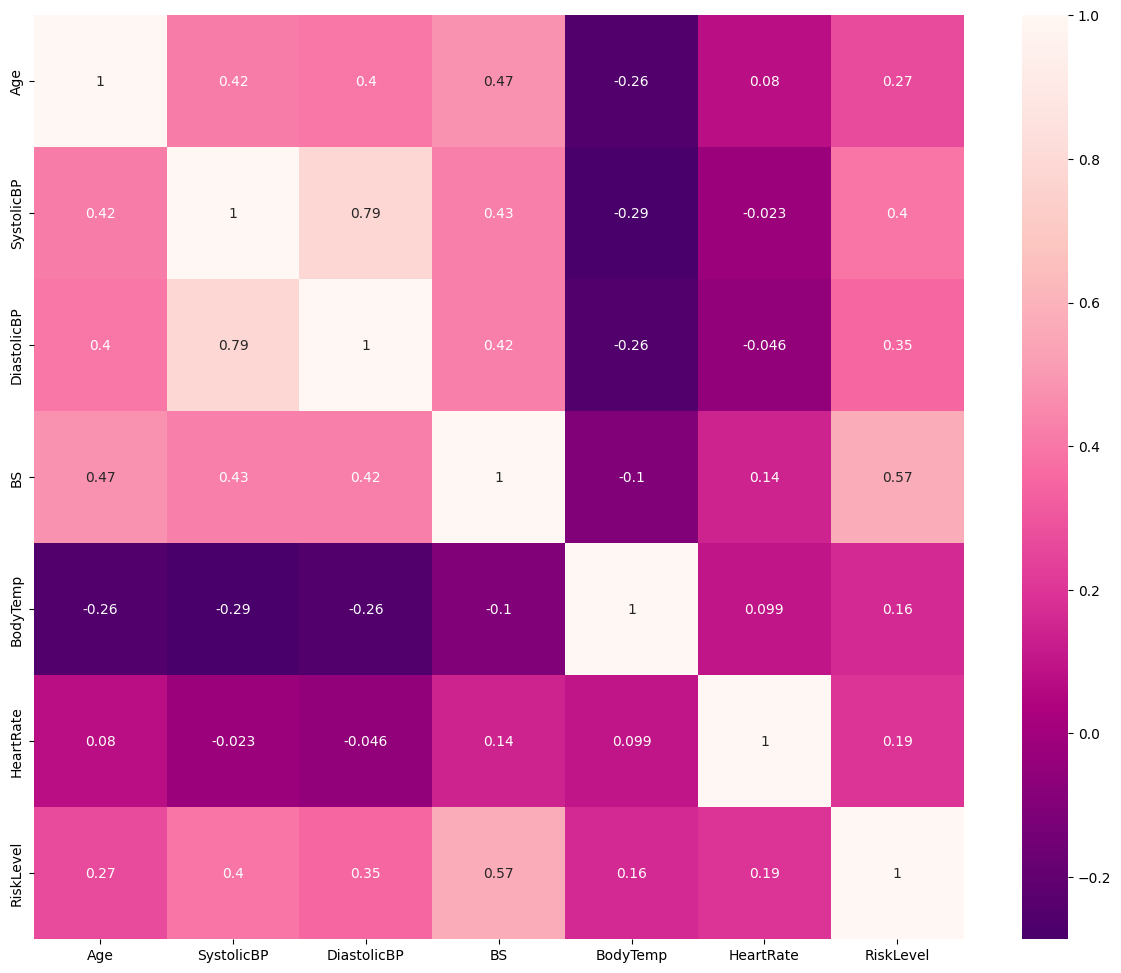

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='RdPu_r')
plt.show()

In [8]:
x = np.array(df[df.columns[:6]].values)
y = np.array(df["RiskLevel"].values)

print(f"x = {x}")
print(f"y = {y}")

x = [[ 25. 130.  80.  15.  98.  86.]
 [ 35. 140.  90.  13.  98.  70.]
 [ 29.  90.  70.   8. 100.  80.]
 ...
 [ 35.  85.  60.  19.  98.  86.]
 [ 43. 120.  90.  18.  98.  70.]
 [ 32. 120.  65.   6. 101.  76.]]
y = [3 3 3 ... 3 3 2]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

print(f"Number of training samples: {x_train.shape[0]}")
print(f"Number of test samples: {x_test.shape[0]}")

Number of training samples: 811
Number of test samples: 203


In [10]:
def print_grid_cv_results(grid_result):
    print(
        f"Best model score: {grid_result.best_score_} "
        f"Best model params: {grid_result.best_params_} "
    )
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    params = grid_result.cv_results_["params"]

    for mean, std, param in zip(means, stds, params):
        mean = round(mean, 4)
        std = round(std, 4)
        print(f"{mean} (+/- {2 * std}) with: {param}")

### Classification examples (risk=categorical)

In [11]:
params = {
    "n_neighbors": [3, 4, 5, 6],
    "weights": ["uniform", "distance"]
}

clf = KNeighborsClassifier()
gsc = GridSearchCV(clf, params)

grid_result = gsc.fit(x_train, y_train)
print_grid_cv_results(grid_result=grid_result)


Best model score: 0.7891009619025978 Best model params: {'n_neighbors': 3, 'weights': 'distance'} 
0.6904 (+/- 0.0484) with: {'n_neighbors': 3, 'weights': 'uniform'}
0.7891 (+/- 0.0508) with: {'n_neighbors': 3, 'weights': 'distance'}
0.6646 (+/- 0.03) with: {'n_neighbors': 4, 'weights': 'uniform'}
0.7768 (+/- 0.0696) with: {'n_neighbors': 4, 'weights': 'distance'}
0.656 (+/- 0.0582) with: {'n_neighbors': 5, 'weights': 'uniform'}
0.7854 (+/- 0.0484) with: {'n_neighbors': 5, 'weights': 'distance'}
0.6399 (+/- 0.0356) with: {'n_neighbors': 6, 'weights': 'uniform'}
0.7842 (+/- 0.0524) with: {'n_neighbors': 6, 'weights': 'distance'}


In [18]:
params = {
    "n_estimators": [50, 100, 200, 300],
    "min_samples_split": [2, 3, 4, 5, 6]
}

clf = RandomForestClassifier()
gsc = GridSearchCV(clf, params)

grid_result = gsc.fit(x_train, y_train)
print_grid_cv_results(grid_result=grid_result)

Best model score: 0.8285389684162692 Best model params: {'min_samples_split': 2, 'n_estimators': 100} 
0.8224 (+/- 0.0606) with: {'min_samples_split': 2, 'n_estimators': 50}
0.8285 (+/- 0.0646) with: {'min_samples_split': 2, 'n_estimators': 100}
0.8273 (+/- 0.0698) with: {'min_samples_split': 2, 'n_estimators': 200}
0.8199 (+/- 0.076) with: {'min_samples_split': 2, 'n_estimators': 300}
0.8175 (+/- 0.0622) with: {'min_samples_split': 3, 'n_estimators': 50}
0.8187 (+/- 0.0714) with: {'min_samples_split': 3, 'n_estimators': 100}
0.8224 (+/- 0.0742) with: {'min_samples_split': 3, 'n_estimators': 200}
0.8224 (+/- 0.0714) with: {'min_samples_split': 3, 'n_estimators': 300}
0.8199 (+/- 0.056) with: {'min_samples_split': 4, 'n_estimators': 50}
0.8162 (+/- 0.043) with: {'min_samples_split': 4, 'n_estimators': 100}
0.8162 (+/- 0.0642) with: {'min_samples_split': 4, 'n_estimators': 200}
0.8175 (+/- 0.0484) with: {'min_samples_split': 4, 'n_estimators': 300}
0.8064 (+/- 0.0578) with: {'min_samples

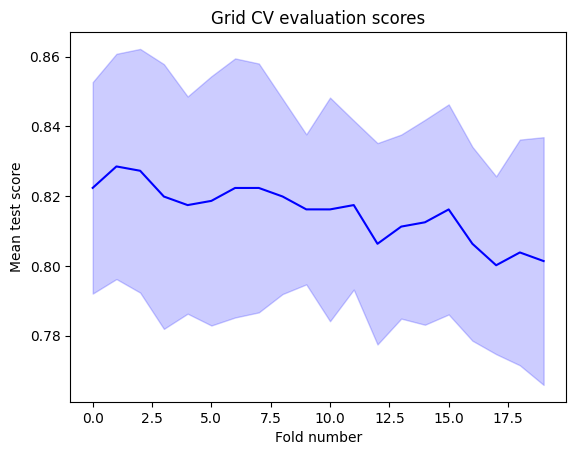

In [35]:
cv_results = pd.DataFrame(grid_result.cv_results_)

x_plot = cv_results.index
mean = cv_results.mean_test_score
std = cv_results.std_test_score

plt.plot(x_plot, mean, 'b-', label='mean')
plt.fill_between(x_plot, mean - std, mean + std, color='b', alpha=0.2)
plt.xlabel("Fold number")
plt.ylabel("Mean test score")
plt.title("Grid CV evaluation scores")
plt.show()

Training score: 0.9321824907521579
Test score: 0.8029556650246306


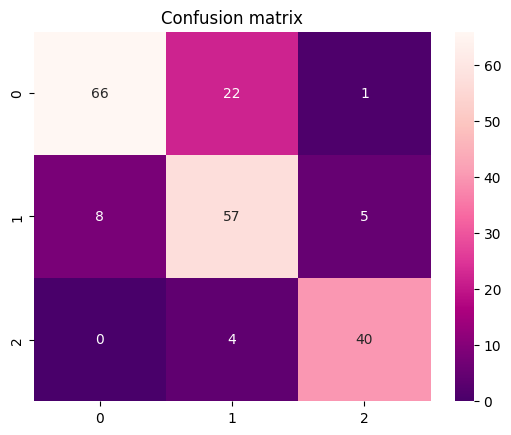

In [19]:
random_forest_clf = RandomForestClassifier(min_samples_split=2, n_estimators=50)
random_forest_clf.fit(x_train, y_train)

print(f"Training score: {random_forest_clf.score(x_train, y_train)}")
print(f"Test score: {random_forest_clf.score(x_test, y_test)}")
y_pred = random_forest_clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm,annot=True,cmap='RdPu_r')
plt.title("Confusion matrix")
plt.show()

<AxesSubplot: title={'center': 'Random Forest Feature importance'}>

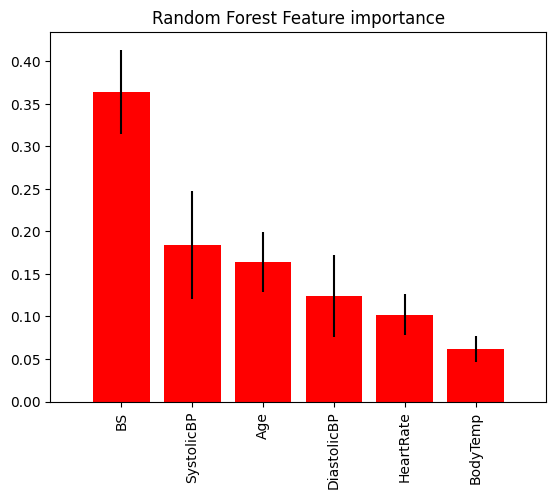

In [25]:
skplt.estimators.plot_feature_importances(random_forest_clf, feature_names=df.columns[:6], title="Random Forest Feature importance", x_tick_rotation=90,)

### Compare prediction to truth

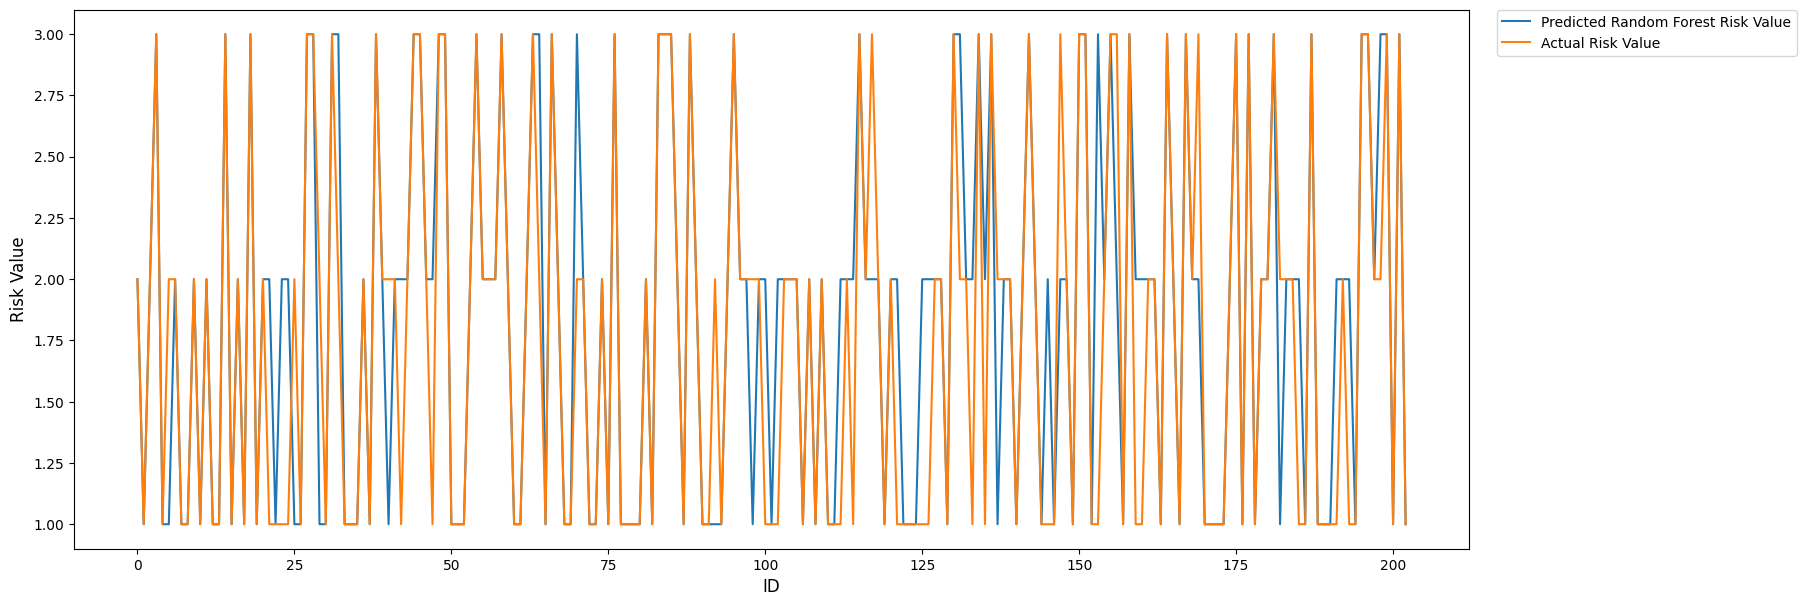

In [14]:
random_forest_result = pd.DataFrame({'Predicted risk': y_pred, 'Actual risk': y_test})

plt.figure(figsize=(18,7))
ax=sns.lineplot(x=np.arange(0,len(y_pred)),y=y_pred,label = 'Predicted Random Forest Risk Value')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Risk Value')
ax.set_xlabel('ID',fontsize=12)
ax.set_ylabel('Risk Value',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
plt.legend(prop={'size':'15'})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Testing AutoML

In [15]:
automl = AutoML()
automl.fit(x_train, y_train, task="classification")

[flaml.automl.automl: 02-27 09:14:13] {2716} INFO - task = classification
[flaml.automl.automl: 02-27 09:14:13] {2718} INFO - Data split method: stratified
[flaml.automl.automl: 02-27 09:14:13] {2721} INFO - Evaluation method: cv
[flaml.automl.automl: 02-27 09:14:13] {2848} INFO - Minimizing error metric: log_loss
[flaml.automl.automl: 02-27 09:14:13] {2898} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl.automl: 02-27 09:14:13] {2994} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 02-27 09:14:13] {3323} INFO - iteration 0, current learner rf
[flaml.automl.automl: 02-27 09:14:26] {3461} INFO - Estimated sufficient time budget=10000s. Estimated necessary time budget=10s.
[fla

c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-27 09:15:50] {3508} INFO -  at 96.9s,	estimator xgboost's best error=0.5232,	best estimator xgboost's best error=0.5232
[flaml.automl.automl: 02-27 09:15:50] {3323} INFO - iteration 3, current learner extra_tree
[flaml.automl.automl: 02-27 09:16:17] {3508} INFO -  at 123.8s,	estimator extra_tree's best error=1.5769,	best estimator xgboost's best error=0.5232
[flaml.automl.automl: 02-27 09:16:17] {3323} INFO - iteration 4, current learner xgb_limitdepth


c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-27 09:16:21] {3508} INFO -  at 127.9s,	estimator xgb_limitdepth's best error=0.5360,	best estimator xgboost's best error=0.5232
[flaml.automl.automl: 02-27 09:16:21] {3323} INFO - iteration 5, current learner lrl1
[flaml.automl.automl: 02-27 09:16:22] {3508} INFO -  at 128.2s,	estimator lrl1's best error=0.8726,	best estimator xgboost's best error=0.5232


c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-27 09:16:34] {3772} INFO - retrain xgboost for 12.4s
[flaml.automl.automl: 02-27 09:16:34] {3779} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.8815698870579244, colsample_bynode=None,
              colsample_bytree=0.7057137578225323, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.002432260930606481, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=4,
              min_child_weight=0.7673654415794792, missing=nan,
              monotone_constraints=None, n_estimators=8315, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)
[flaml.a

In [16]:
print(f"The best estimator is {automl.best_estimator}")
print(f"The best configuration is: {automl.best_config}")

The best estimator is xgboost
The best configuration is: {'n_estimators': 8315, 'max_leaves': 4, 'min_child_weight': 0.7673654415794792, 'learning_rate': 0.002432260930606481, 'subsample': 0.8476000618302348, 'colsample_bylevel': 0.8815698870579244, 'colsample_bytree': 0.7057137578225323, 'reg_alpha': 0.0016838090603716895, 'reg_lambda': 0.28815989841009226}


In [17]:
from sklearn.preprocessing import LabelEncoder # labels starting with 0 needed for xgboost!
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

from xgboost import XGBClassifier
bst = XGBClassifier(**automl.best_config)
bst.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8815698870579244, colsample_bynode=None,
              colsample_bytree=0.7057137578225323, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.002432260930606481,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=4,
              min_child_weight=0.7673654415794792, missing=nan,
              monotone_constraints=None, n_estimators=8315, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

Train score: 0.9321824907521579
Test score: 0.8177339901477833


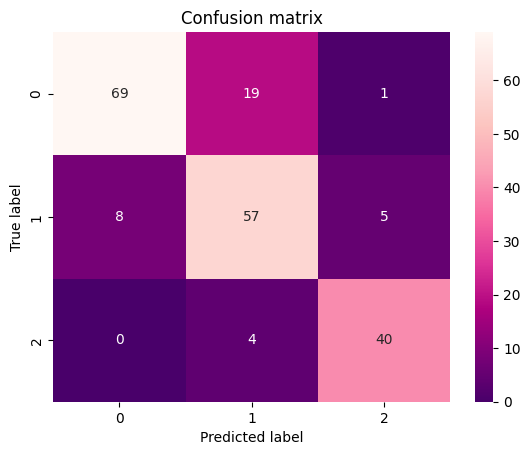

In [18]:
print(f"Train score: {bst.score(x_train, y_train)}")
print(f"Test score: {bst.score(x_test, y_test)}")

y_pred = bst.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm,annot=True,cmap='RdPu_r')
plt.title("Confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Low risk is sometimes classified as mid risk. This can be accepted, the opposite would be a problem.

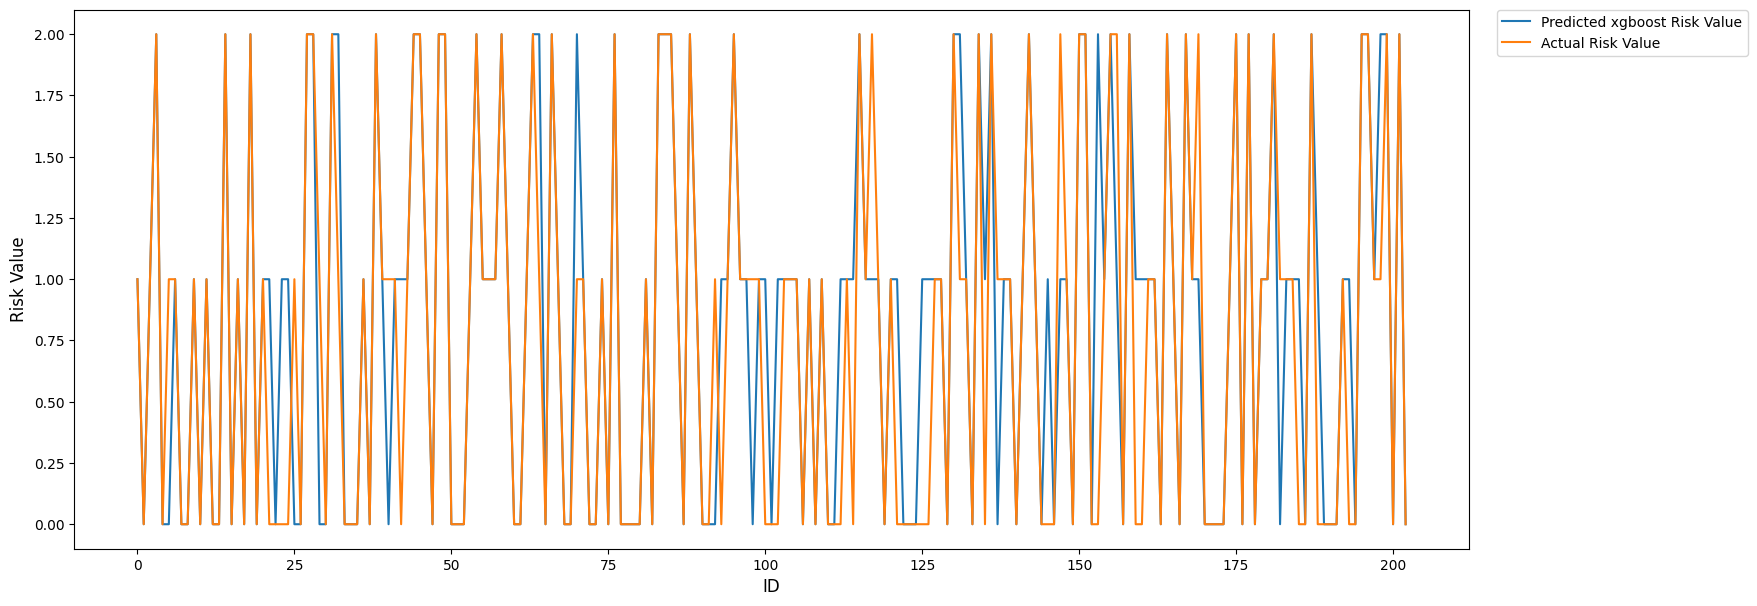

In [19]:
xgboost_result = pd.DataFrame({'Predicted risk': y_pred, 'Actual risk': y_test})

plt.figure(figsize=(18,7))
ax=sns.lineplot(x=np.arange(0,len(y_pred)),y=y_pred,label = 'Predicted xgboost Risk Value')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Risk Value')
ax.set_xlabel('ID',fontsize=12)
ax.set_ylabel('Risk Value',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
plt.legend(prop={'size':'15'})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()